# 1. EDA

## 1.1 Load data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet(Path('data') / 'train.parquet')
test = pd.read_parquet(Path('data') / 'test.parquet')

In [3]:
test.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
56474,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 05:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
56477,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2.0,2021-08-10 06:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.098612
56480,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 07:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
56483,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2021-08-10 09:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
56486,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 10:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147


In [4]:
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 56474 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 41608 non-null  category      
 1   counter_name               41608 non-null  category      
 2   site_id                    41608 non-null  int64         
 3   site_name                  41608 non-null  category      
 4   bike_count                 41608 non-null  float64       
 5   date                       41608 non-null  datetime64[ns]
 6   counter_installation_date  41608 non-null  datetime64[ns]
 7   coordinates                41608 non-null  category      
 8   counter_technical_id       41608 non-null  category      
 9   latitude                   41608 non-null  float64       
 10  longitude                  41608 non-null  float64       
 11  log_bike_count             41608 non-null  float64       
dtyp

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 48321 to 928462
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   coordinates                455163 non-null  category      
 8   counter_technical_id       455163 non-null  category      
 9   latitude                   455163 non-null  float64       
 10  longitude                  455163 non-null  float64       
 11  log_bike_count             455163 non-null  floa

In [7]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    977
date                         8230
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                977
dtype: int64

In [8]:
data.groupby(['site_name', 'counter_name'])['bike_count'].sum().sort_values(ascending=False).head(10).to_frame()

,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1809231.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1406900.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1357868.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1036575.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,914089.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,888717.0
Quai d'Orsay,Quai d'Orsay E-O,849724.0
Totem Cours la Reine,Totem Cours la Reine O-E,806149.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,806071.0


<AxesSubplot:xlabel='date'>

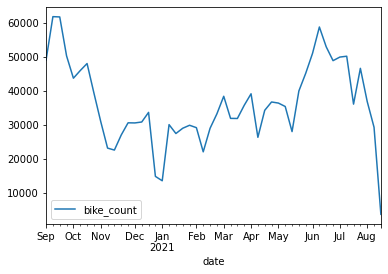

In [9]:
mask = data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N'

data[mask].groupby(pd.Grouper(freq='1w', key='date'))[['bike_count']].sum().plot()

<AxesSubplot:xlabel='date'>

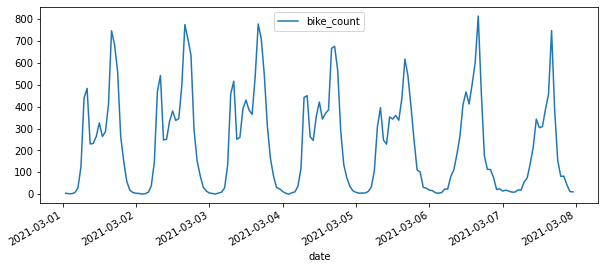

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = ((data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N')
        & (data['date'] > pd.to_datetime('2021/03/01'))
        & (data['date'] < pd.to_datetime('2021/03/08')))

data[mask].plot(x='date', y='bike_count', ax=ax)

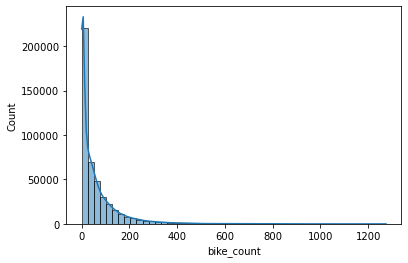

In [11]:
import seaborn as sns

ax = sns.histplot(data, x='bike_count', kde=True, bins=50)

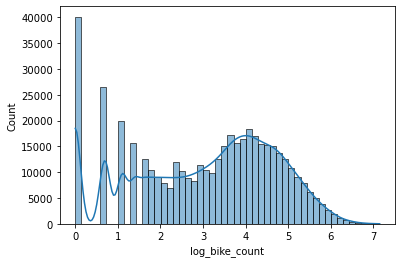

In [12]:
ax = sns.histplot(data, x='log_bike_count', kde=True, bins=50)

## 1.2. Feature engineering: encode dates with sine-cosine transformation

In [13]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "month_sin"] = np.sin(X["date"].dt.month * 2 * np.pi / 12)
    X.loc[:, "month_cos"] = np.cos(X["date"].dt.month * 2 * np.pi / 12)
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "weekday_sin"] = np.sin(X["date"].dt.weekday * 2 * np.pi / 7)
    X.loc[:, "weekday_cos"] = np.cos(X["date"].dt.weekday * 2 * np.pi / 7)
    X.loc[:, "hour"] = X["date"].dt.hour
    X.loc[:, "hour_sin"] = np.sin(X["date"].dt.hour * 2 * np.pi / 24)
    X.loc[:, "hour_cos"] = np.cos(X["date"].dt.hour * 2 * np.pi / 24)

    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"]) 

In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit_transform(_encode_dates(data[['date']])[['hour']].head())

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 1.3. Add external data

--> check for Nans

In [15]:
__file__ = Path('submissions') /  'external_data' /  'estimator.py'


def _merge_external_data(X):
    file_path = Path(__file__).parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    
    X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date', 't', 'u', 'rr1', 'n', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour' ]].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X

In [16]:
import problem

X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

In [17]:
X_train_merge = _merge_external_data(X_train)
X_train_merge.head()
X_test_merge = _merge_external_data(X_test)

In [18]:
for column in X_train_merge.columns:
    X_train_merge[column].fillna(X_train_merge[column].mode()[0], inplace=True)

for column in X_test_merge.columns:
    X_test_merge[column].fillna(X_test_merge[column].mode()[0], inplace=True)

In [24]:
y_train

array([1.60943791, 1.38629436, 0.        , ..., 2.48490665, 1.60943791,
       1.38629436])

In [23]:
X_train_merge.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,t,u,rr1,n,lockdown,ferie,curfew,vacances,rush_hour
0,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,285.75,81,0.0,0.0,0,0,0,0,0
30,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,285.75,81,0.0,0.0,0,0,0,0,0
31,100036719-104036719,18 quai de l'Hôtel de Ville NO-SE,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,285.75,81,0.0,0.0,0,0,0,0,0
32,100036719-103036719,18 quai de l'Hôtel de Ville SE-NO,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,285.75,81,0.0,0.0,0,0,0,0,0
33,100063175-353277233,20 Avenue de Clichy NO-SE,100063175,20 Avenue de Clichy,2020-09-01 01:00:00,2020-07-22,"48.88529,2.32666",Y2H20073268,48.885290,2.326660,285.75,81,0.0,0.0,0,0,0,0,0


In [25]:
X_train_merge['lag'] = y_train.tolist()

In [27]:
X_train_merge.set_index(["date"]).shift(1)

,counter_id,counter_name,site_id,site_name,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,t,u,rr1,n,lockdown,ferie,curfew,vacances,rush_hour,lag
date,,,,,,,,,,,,,,,,,,,
2020-09-01 01:00:00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01 01:00:00,100049407-353255860,152 boulevard du Montparnasse E-O,100049407.0,152 boulevard du Montparnasse,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,285.75,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438
2020-09-01 01:00:00,100049407-353255859,152 boulevard du Montparnasse O-E,100049407.0,152 boulevard du Montparnasse,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,285.75,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
2020-09-01 01:00:00,100036719-104036719,18 quai de l'Hôtel de Ville NO-SE,100036719.0,18 quai de l'Hôtel de Ville,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,285.75,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2020-09-01 01:00:00,100036719-103036719,18 quai de l'Hôtel de Ville SE-NO,100036719.0,18 quai de l'Hôtel de Ville,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,285.75,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-09 23:00:00,100057329-104057329,Totem 85 quai d'Austerlitz NO-SE,100057329.0,Totem 85 quai d'Austerlitz,2020-02-18,"48.84201,2.36729",YTH19111508,48.842010,2.367290,291.45,72.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,1.386294
2021-08-09 23:00:00,100057329-103057329,Totem 85 quai d'Austerlitz SE-NO,100057329.0,Totem 85 quai d'Austerlitz,2020-02-18,"48.84201,2.36729",YTH19111508,48.842010,2.367290,291.45,72.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,2.833213
2021-08-09 23:00:00,100057380-104057380,Totem Cours la Reine E-O,100057380.0,Totem Cours la Reine,2020-02-11,"48.86462,2.31444",YTH19111509,48.864620,2.314440,291.45,72.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,2.079442


## 1.4. Distribution: pairplot, correlation etc

In [19]:
X_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 0 to 455162
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   date                       455163 non-null  datetime64[ns]
 5   counter_installation_date  455163 non-null  datetime64[ns]
 6   coordinates                455163 non-null  category      
 7   counter_technical_id       455163 non-null  category      
 8   latitude                   455163 non-null  float64       
 9   longitude                  455163 non-null  float64       
 10  t                          455163 non-null  float64       
 11  u                          455163 non-null  int64   

In [20]:
X_train_merge.isnull().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
t                            0
u                            0
rr1                          0
n                            0
lockdown                     0
ferie                        0
curfew                       0
vacances                     0
rush_hour                    0
dtype: int64

vu que freq metro has lots of nulls (1/4 of the data) can do a prediction to fill the gaps

In [21]:
import seaborn as sns
#sns.pairplot(X_train_merge)

<AxesSubplot:>

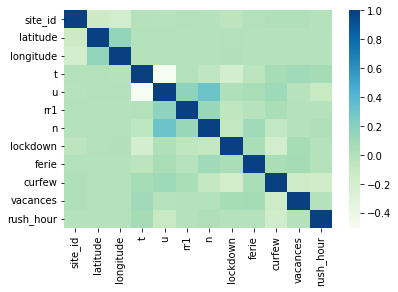

In [22]:
import seaborn as sns
correlation = X_train_merge.corr()
sns.heatmap(correlation, cmap='GnBu')

# 2. Modelling

In [ ]:
# LSTM Deep NN
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

train_X = X_train_merge
train_y = y_train
test_X = X_test_merge
test_y = y_test

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

## 2.1. Ridge Regression

In [23]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = Ridge()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x16fcda310>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [24]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=1.13
Test set, RMSE=1.15


## 2.2. Random Forest

In [25]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = RandomForestRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.14
Test set, RMSE=0.46


## 2.3. XGBoost

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = GradientBoostingRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x173d4e790>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.73
Test set, RMSE=0.68


## 2.4 Hist-grad boosting

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

# randomized search + grid search

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

regressor = HistGradientBoostingRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x173d4e790>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.50
Test set, RMSE=0.54


## 2.5. LightGBM

In [23]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [24]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [25]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'lgbmregressor__num_leaves': sp_randint(6, 50), 
             'lgbmregressor__min_child_samples': sp_randint(100, 500), 
             'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgbmregressor__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'lgbmregressor__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# grid search lightgbm

In [26]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb
    
date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist() #date_cols = ['year', 'month_sin', 'day', 'weekday_sin', 'hour_sin', 'month_cos', 'weekday_cos', 'hour_cos']

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'rr1', 'n', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour' ]

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])


#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
reg = lgb.LGBMRegressor(max_depth=-1, random_state=314, metric='neg_mean_square_error', n_jobs=4, n_estimators=5000)

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    reg
)

gs = RandomizedSearchCV(
    estimator=pipe, param_distributions=param_test, n_iter=50,
    refit=True,
    random_state=314,
    verbose=True)


gs.fit(X_train_merge, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'functiontransformer-1', 'functiontransformer-2', 'columntransformer', 'lgbmregressor', 'functiontransformer-1__accept_sparse', 'functiontransformer-1__check_inverse', 'functiontransformer-1__func', 'functiontransformer-1__inv_kw_args', 'functiontransformer-1__inverse_func', 'functiontransformer-1__kw_args', 'functiontransformer-1__validate', 'functiontransformer-2__accept_sparse', 'functiontransformer-2__check_inverse', 'functiontransformer-2__func', 'functiontransformer-2__inv_kw_args', 'functiontransformer-2__inverse_func', 'functiontransformer-2__kw_args', 'functiontransformer-2__validate', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__date', 'columntransformer__cat', 'columntransformer__numeric', 'columntransformer_

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'n', 'lockdown', 'freq_metro', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

#regressor = HistGradientBoostingRegressor(random_state=1)
regressor = lgb.LGBMRegressor(random_state=42)

#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}


pipe =  make_pipeline(
    FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

clf = GridSearchCV(pipe, param_grid = parameters, scoring='neg_mean_squared_error')

In [ ]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=6)

scores = cross_val_score(gs, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', error_score='raise')
print(f'RMSE: {-scores.mean():.3} ± {(-scores).std():.3}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/herminetranie/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/herminetranie/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/herminetranie/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/lightgbm/sklearn.py", line 923, in fit
    _LGBMCheckClassificationTargets(y)
  File "/Users/herminetranie/opt/anaconda3/envs/bikes-ramp/lib/python3

ValueError: Unknown label type: 'continuous'

## 2.5. LightGBM

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import lightgbm as lgb

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = lgb.LGBMRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x173d4e790>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.50
Test set, RMSE=0.52


## 2.6. CatBoost

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import catboost as cb

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t', 'u', 'lockdown', 'ferie', 'curfew', 'vacances', 'rush_hour']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = cb.CatBoostRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Learning rate set to 0.107689
0:	learn: 1.5655178	total: 89.7ms	remaining: 1m 29s
1:	learn: 1.4723852	total: 111ms	remaining: 55.6s
2:	learn: 1.3932357	total: 134ms	remaining: 44.7s
3:	learn: 1.3251174	total: 156ms	remaining: 38.9s
4:	learn: 1.2684416	total: 179ms	remaining: 35.7s
5:	learn: 1.2175898	total: 204ms	remaining: 33.8s
6:	learn: 1.1742550	total: 226ms	remaining: 32.1s
7:	learn: 1.1366795	total: 257ms	remaining: 31.8s
8:	learn: 1.1044825	total: 283ms	remaining: 31.2s
9:	learn: 1.0768897	total: 306ms	remaining: 30.3s
10:	learn: 1.0524522	total: 328ms	remaining: 29.5s
11:	learn: 1.0326026	total: 351ms	remaining: 28.9s
12:	learn: 1.0137899	total: 373ms	remaining: 28.3s
13:	learn: 0.9984163	total: 399ms	remaining: 28.1s
14:	learn: 0.9795297	total: 428ms	remaining: 28.1s
15:	learn: 0.9620312	total: 452ms	remaining: 27.8s
16:	learn: 0.9488092	total: 487ms	remaining: 28.2s
17:	learn: 0.9339872	total: 512ms	remaining: 27.9s
18:	learn: 0.9245255	total: 538ms	remaining: 27.8s
19:	learn

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x173d4e790>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.40
Test set, RMSE=0.46


## 2.7. Feature Importance + Hyperparameter tuning of best model

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

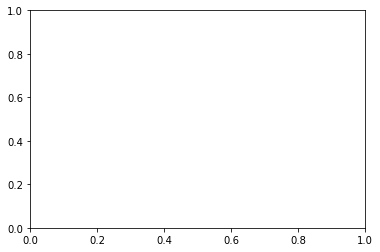

In [ ]:
# Feature Importance
merger = pipe[:2]
X_train_augmented = merger.transform(X_train_merge)
X_test_augmented = merger.transform(X_test_merge)

predictor = pipe[2:]
_ = predictor.fit(X_train_augmented, y_train)

from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    predictor, X_train_augmented[:20000], y_train[:20000], n_repeats=10, random_state=0
)

sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train_augmented.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
importance = pipe.steps[1][1].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

AttributeError: 'ColumnTransformer' object has no attribute 'feature_importances_'

In [ ]:
# Hyperparameter tuning

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(pipe, param_grid = param_grid, scoring='neg_mean_squared_error')

from sklearn.model_selection import cross_val_score, TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=6)

scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', error_score='raise')
print(f'RMSE: {-scores.mean():.3} ± {(-scores).std():.3}')

ValueError: Invalid parameter criterion for estimator Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x173d4e790>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
                                                 ('numeric', 'passthrough',
                                                  ['t', 'u', 'lockdown',
                                                   'ferie', 'curfew',
                                                   'vacances',
                                                   'rush_hour'])])),
                ('randomforestregressor', RandomForestRegressor())]). Check the list of available parameters with `estimator.get_params().keys()`.